**Doubt regarding the use of logistic regresssion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Wine.csv')    #labelled data
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
 # 1 #PCA for labelled data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array([3, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred1)
cm

array([[ 0,  1, 13],
       [ 2, 13,  1],
       [ 6,  0,  0]])

In [ ]:
accuracy_score(y_test,y_pred1)

0.3611111111111111

In [ ]:
# 2 #PCA Kernel to increease the accuracy
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([1, 2, 2, 1, 3, 1, 1, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 3, 2, 3, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred2)
cm

array([[14,  0,  0],
       [ 1,  8,  7],
       [ 0,  6,  0]])

In [ ]:
accuracy_score(y_test,y_pred2)

0.6111111111111112

In [ ]:
# 3 #Model Building , anmother technique for Feature extraction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA(n_components=2)
X_train = model.fit_transform(X_train,y_train)
X_test = model.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 2, 2, 1, 3, 1, 1, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 3, 2, 3, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1,  8,  7],
       [ 0,  6,  0]])

In [ ]:
accuracy_score(y_test,y_pred)

0.6111111111111112

**NEW DATASET**

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
load_iris

<function sklearn.datasets._base.load_iris(*, return_X_y=False, as_frame=False)>

In [ ]:
#Load the Dataset
X, y = load_iris(return_X_y=True)

In [ ]:
#Elbow Method
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

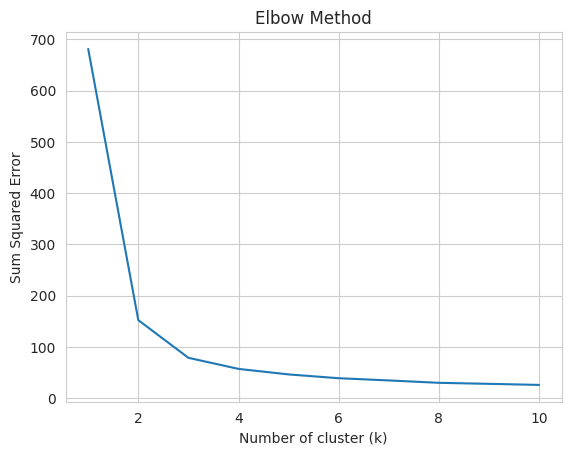

In [ ]:
#Plot the Elbow graph to find the optimum number of cluster
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [ ]:
#Build the Kmeans clustering model
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [ ]:
#Find the cluster center
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
#Predict the cluster group:
pred = kmeans.fit_predict(X)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

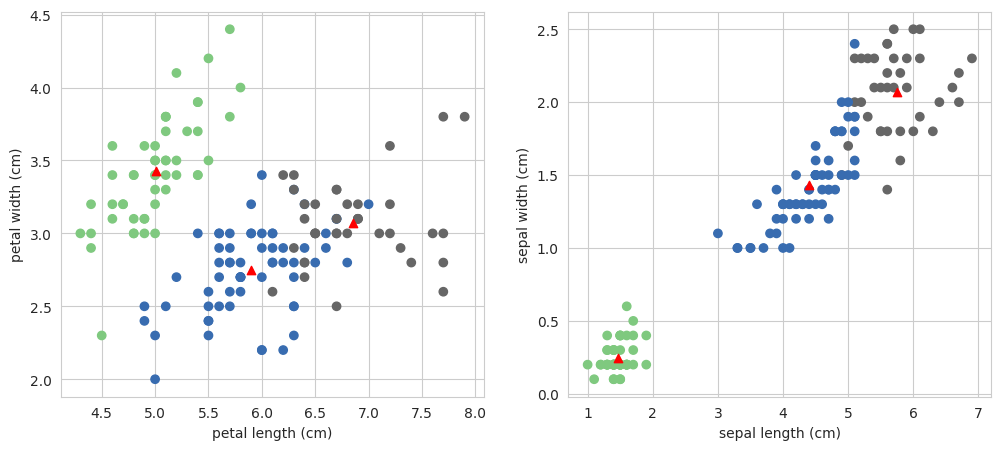

In [ ]:
#Plot the cluster center with data points
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

**NEW DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Heart_Disease.csv")
df.head()

,age,sex,Chest Pain Type,trestbps,chol,fbs,cardio_result,max_heartrate,exercise_angina,ST_depression,slope,no_majorvessel(0-3),thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isna().sum()

age                    0
sex                    0
Chest Pain Type        0
trestbps               0
chol                   0
fbs                    0
cardio_result          0
max_heartrate          0
exercise_angina        0
ST_depression          0
slope                  0
no_majorvessel(0-3)    0
thal                   0
target                 0
dtype: int64

In [ ]:
#Data preprocessing
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=df.drop('target',axis='columns')
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=1)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
parameter={
            'criterion' :['gini', 'entropy', 'log_loss'],
            'splitter' :['best', 'random'],
            'max_depth':[1,2,3,4,5],
            'max_feature':['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#model=DecisionTreeClassifier(max_depth=2)
model=DecisionTreeClassifier()
cv=GridSearchCV(model,param_grid=parameter,cv=5,scoring="accuracy")

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  9],
       [ 8, 23]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7213114754098361

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5297619047619048, 0.95, 'x[2] <= -0.469\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(0.2916666666666667, 0.85, 'x[11] <= -0.226\ngini = 0.377\nsamples = 111\nvalue = [83, 28]'),
 Text(0.17857142857142858, 0.75, 'x[8] <= 0.39\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.09523809523809523, 0.65, 'x[12] <= 0.346\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.047619047619047616, 0.55, 'x[7] <= -2.255\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.023809523809523808, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07142857142857142, 0.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.14285714285714285, 0.55, 'x[9] <= -0.523\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.11904761904761904, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666666, 0.45, 'x[0] <= -0.107\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.14285714285714285, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1904761

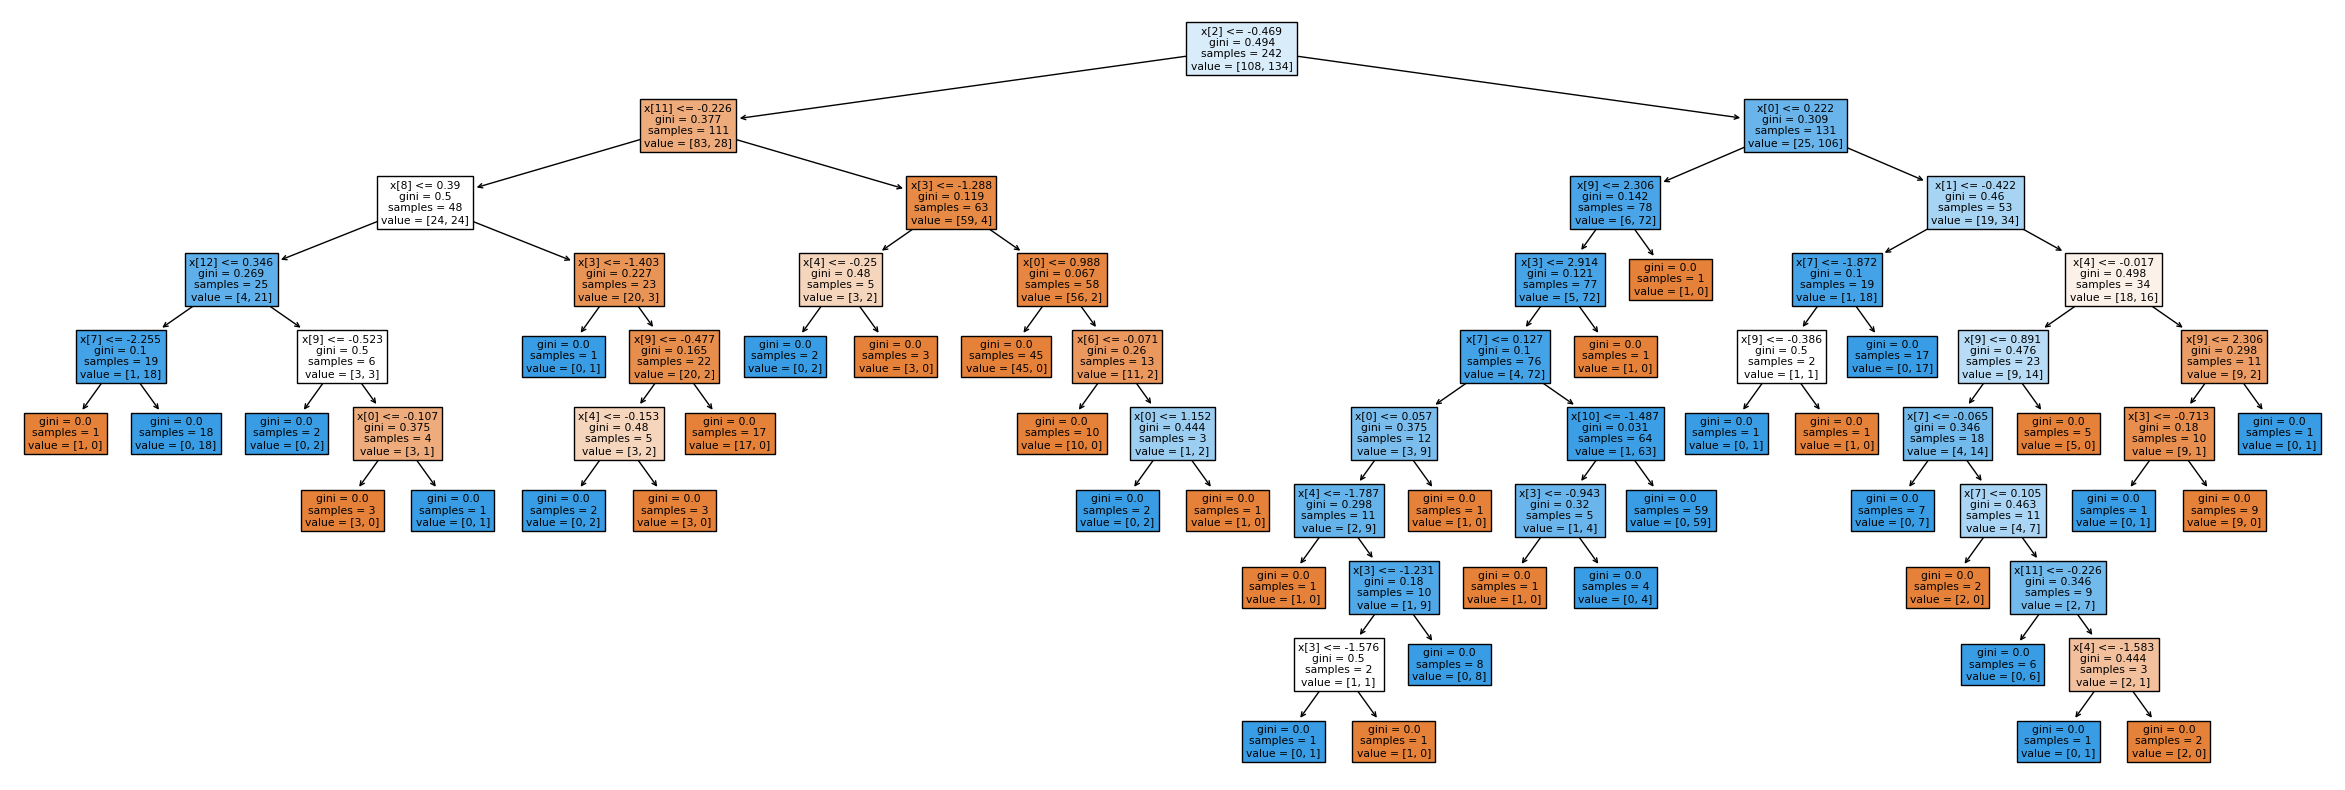

In [ ]:
plt.figure(figsize=(30,10))
tree.plot_tree(model,filled=True)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [ ]:
#model=DecisionTreeClassifier(max_depth=2)
model=DecisionTreeClassifier()
cv=GridSearchCV(model,param_grid=parameter,cv=5,scoring="accuracy")

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[20, 10],
       [ 5, 26]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7540983606557377